In [1]:
print('中阶API主要包括各种模型层,损失函数,优化器,数据管道等等')

中阶API主要包括各种模型层,损失函数,优化器,数据管道等等


In [2]:
import datetime
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
printbar()


================================================================================2022-04-27 16:35:40


### 1. 线性回归模型

#### 1.1 准备数据

In [6]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [8]:
x = torch.rand([3, 2])
x

tensor([[0.9733, 0.8099],
        [0.3901, 0.1777],
        [0.5720, 0.0789]])

In [9]:
w0 = torch.tensor([[2.0], [-3.0]])
w0

tensor([[ 2.],
        [-3.]])

In [11]:
b0 = torch.tensor([10.0])
b0

tensor([10.])

In [10]:
x @ w0

tensor([[-0.4833],
        [ 0.2470],
        [ 0.9074]])

In [13]:
x @ w0 + b0

tensor([[ 9.5167],
        [10.2470],
        [10.9074]])

In [14]:
# 样本数量
n = 400
# 生成测试用的数据集
x = 10 * torch.rand([n, 2]) - 5.0 # (400, 2)
w0 = torch.tensor([[2.0], [-3.0]]) # (2, 1)
b0 = torch.tensor([10.0])
y = x @ w0 + b0 + torch.normal(0.0, 2.0, size = [n ,1]) # @是矩阵乘法，后面加的是干扰项
print('y的行列数为:', y.shape)

y的行列数为: torch.Size([400, 1])


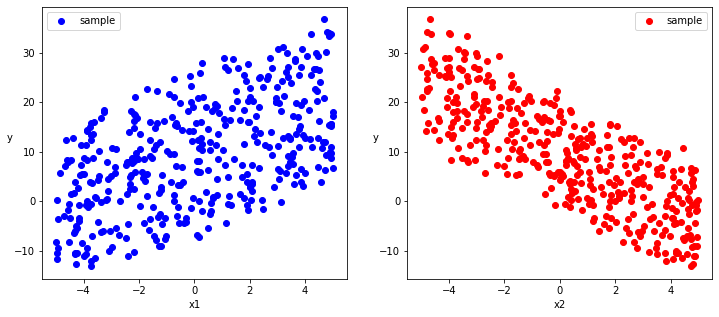

In [20]:
# 数据可视化
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
plt.figure(figsize = (12, 5))
ax1 = plt.subplot(121)
ax1.scatter(x[:, 0], y[:, 0], c = 'b', label = 'sample')
ax1.legend()
plt.xlabel('x1')
# rotation = 0是根据y的反转，若是默认的话，y会反转
plt.ylabel('y', rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(x[:, 1], y[:, 0], c = 'r', label = 'sample')
ax2.legend()
plt.xlabel('x2')
plt.ylabel('y', rotation = 0)

plt.show()

In [23]:
print('构建输入数据管道!')
ds = TensorDataset(x, y)
ds

构建输入数据管道!


In [26]:
for f, l in ds:
    print('数据的特征为:{}, 所对应的属性为:{}'.format(f, l))

数据的特征为:tensor([ 1.0809, -0.7711]), 所对应的属性为:tensor([16.5458])
数据的特征为:tensor([3.7760, 0.7512]), 所对应的属性为:tensor([10.9926])
数据的特征为:tensor([ 1.5144, -3.9692]), 所对应的属性为:tensor([22.2512])
数据的特征为:tensor([-1.1993,  2.5777]), 所对应的属性为:tensor([2.2619])
数据的特征为:tensor([ 4.3480, -1.4930]), 所对应的属性为:tensor([22.5958])
数据的特征为:tensor([0.8380, 1.3259]), 所对应的属性为:tensor([8.4474])
数据的特征为:tensor([-3.6487, -1.8807]), 所对应的属性为:tensor([8.7898])
数据的特征为:tensor([ 4.3749, -3.0056]), 所对应的属性为:tensor([30.0195])
数据的特征为:tensor([-2.3925,  4.8707]), 所对应的属性为:tensor([-11.0812])
数据的特征为:tensor([3.4675, 2.8923]), 所对应的属性为:tensor([7.8941])
数据的特征为:tensor([1.9251, 4.9384]), 所对应的属性为:tensor([-1.7079])
数据的特征为:tensor([3.7681, 0.8863]), 所对应的属性为:tensor([14.6639])
数据的特征为:tensor([ 1.2671, -0.4142]), 所对应的属性为:tensor([16.3350])
数据的特征为:tensor([1.8957, 3.5142]), 所对应的属性为:tensor([5.4886])
数据的特征为:tensor([-1.1762,  0.6278]), 所对应的属性为:tensor([5.2603])
数据的特征为:tensor([ 0.2247, -1.2994]), 所对应的属性为:tensor([12.6910])
数据的特征为:tensor([-2.0971,  0.7124]), 所对应的属性

In [24]:
dl = DataLoader(ds, batch_size = 10, shuffle = True, num_workers = 2)
dl

In [31]:
# 1表示i的序号加1
for i, data in enumerate(dl, 1):
    print('序号为{},所对应的数据为:{}'.format(i, data))

序号为1,所对应的数据为:[tensor([[ 1.7838, -4.3517],
        [ 2.0844,  1.8157],
        [ 4.4834, -3.5113],
        [-3.8797, -3.0570],
        [ 3.8391,  4.2908],
        [-3.0848,  4.2001],
        [ 3.8634, -3.9935],
        [-4.2876,  4.7796],
        [ 3.3059,  4.7111],
        [-1.8333, -0.3549]]), tensor([[ 25.5485],
        [  7.3459],
        [ 26.5600],
        [  8.2697],
        [  3.9215],
        [ -9.9724],
        [ 27.1856],
        [-12.6796],
        [  5.6313],
        [  5.2852]])]
序号为2,所对应的数据为:[tensor([[ 0.1347,  0.7152],
        [-1.8555,  2.0329],
        [ 3.8330, -0.2290],
        [ 4.5740,  4.7686],
        [ 0.6564,  2.9971],
        [-3.9776, -3.5284],
        [-0.4450,  1.4177],
        [-0.6818,  0.6054],
        [-4.6165, -3.3614],
        [-3.2577, -4.8919]]), tensor([[ 5.8739],
        [ 4.5914],
        [19.3691],
        [ 3.9473],
        [ 0.8100],
        [ 8.7264],
        [ 6.9293],
        [ 7.1899],
        [ 8.3983],
        [18.3528]])]
序号为3,所对应的数据为:[

#### 1.2 定义模型

In [53]:
model = nn.Linear(2, 1) # 线性层
model

Linear(in_features=2, out_features=1, bias=True)

In [54]:
model.loss_func = nn.MSELoss() # 均方损失函数 loss = (x, y) ** 2

In [55]:
model.loss_func

MSELoss()

In [56]:
model.optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [57]:
model.optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [58]:
model

Linear(
  in_features=2, out_features=1, bias=True
  (loss_func): MSELoss()
)

#### 1.3 训练模型

In [59]:
#model(x)

In [60]:
def train_step(model, features, labels):
    predictions = model(features)
    loss = model.loss_func(predictions, labels)
    loss.backward()
    model.optimizer.step()
    model.optimizer.zero_grad()
    return loss.item()

# 测试train_step的效果
features, labels = next(iter(dl))
train_step(model, features, labels)

234.1333770751953

In [63]:
def train_model(model, epochs):
    for epoch in range(1, epochs + 1):
        for features, labels in dl:
            loss = train_step(model, features, labels)
        if epoch % 50  == 0:
            printbar()
            w = model.state_dict()['weight']
            b = model.state_dict()['bias']
            print('epoch = ', epoch, 'loss = ', loss)
            print('w = ', w)
            print('b = ', b)
train_model(model, epochs = 250)


================================================================================2022-04-27 18:05:23
epoch =  50 loss =  6.0853271484375
w =  tensor([[ 1.9925, -3.0210]])
b =  tensor([9.9429])

================================================================================2022-04-27 18:06:21
epoch =  100 loss =  3.0923590660095215
w =  tensor([[ 1.9985, -2.9903]])
b =  tensor([9.9247])

================================================================================2022-04-27 18:07:17
epoch =  150 loss =  1.9720737934112549
w =  tensor([[ 2.1624, -3.0411]])
b =  tensor([9.9285])

================================================================================2022-04-27 18:08:11
epoch =  200 loss =  4.998904228210449
w =  tensor([[ 2.0361, -3.1062]])
b =  tensor([9.9462])

================================================================================2022-04-27 18:09:05
epoch =  250 loss =  4.1754469871521
w =  tensor([[ 1.9451, -2.9638]])
b =  tensor([9.9487])


In [67]:
# 可视化
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
w, b = model.state_dict()['weight'], model.state_dict()['bias']

In [68]:
w

tensor([[ 1.9451, -2.9638]])

In [69]:
b

tensor([9.9487])

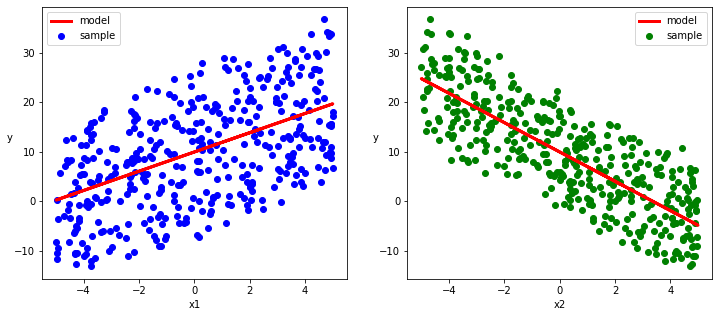

In [72]:
plt.figure(figsize = (12, 5))
ax1 = plt.subplot(121)
ax1.scatter(x[:, 0], y[:, 0], c = 'b', label = 'sample')
ax1.plot(x[:, 0], w[0, 0] * x[:, 0] + b[0], '-r', linewidth = 3.0, label = 'model')
ax1.legend()
plt.xlabel('x1')
plt.ylabel('y', rotation = 0)


ax2 = plt.subplot(122)
ax2.scatter(x[:, 1], y[:, 0], c = 'g', label = 'sample')
ax2.plot(x[:, 0], w[0, 1] * x[:, 0] + b[0], '-r', linewidth = 3.0, label = 'model')
ax2.legend()
plt.xlabel('x2')
plt.ylabel('y', rotation = 0)

plt.show()

### 2. DNN二分类模型

#### 2.1 准备数据

In [76]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [77]:
# 正，负样本数量
print('正，负样本数量')
n_positive, n_negative = 2000, 2000

正，负样本数量


In [78]:
torch.normal(0.0, 1.0, size = [2, 1])

tensor([[ 0.1205],
        [-0.4367]])

In [79]:
torch.rand([2, 1])

tensor([[0.9610],
        [0.5860]])

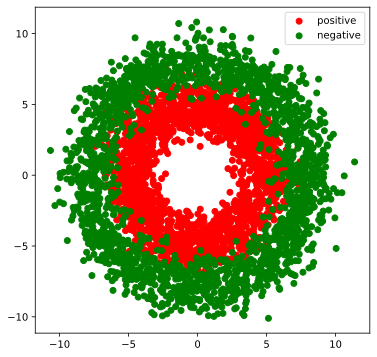

In [80]:
# 生成正样本，小圆环分布
r_p = 5.0 + torch.normal(0.0, 1.0, size = [n_positive, 1])
theta_p = 2 * np.pi * torch.rand([n_positive, 1])
xp = torch.cat([r_p * torch.cos(theta_p), r_p * torch.sin(theta_p)], axis = 1)
yp = torch.ones_like(r_p)


# 生成负样本，大圆环分布
r_n = 8.0 + torch.normal(0.0, 1.0, size = [n_negative, 1])
theta_n = 2 * np.pi * torch.rand([n_negative, 1])
xn = torch.cat([r_n * torch.cos(theta_n), r_n * torch.sin(theta_n)], axis = 1)
yn = torch.zeros_like(r_n)

# 汇总样本
x = torch.cat([xp, xn], axis = 0)
y = torch.cat([yp, yn], axis = 0)

# 可视化
plt.figure(figsize = (6, 6))
plt.scatter(xp[:, 0].numpy(), xp[:, 1].numpy(), c= 'r')
plt.scatter(xn[:, 0].numpy(), xn[:, 1].numpy(), c = 'g')
plt.legend(['positive', 'negative'])

In [81]:
# 构造输入数据管道
ds = TensorDataset(x, y)

In [83]:
for f, l in ds:
    print('f的值为:{}, 其所对应的为:{}'.format(f, l))

f的值为:tensor([-2.0446, -6.0994]), 其所对应的为:tensor([1.])
f的值为:tensor([-0.6879, -2.6054]), 其所对应的为:tensor([1.])
f的值为:tensor([-6.7139, -0.1470]), 其所对应的为:tensor([1.])
f的值为:tensor([ 2.1680, -6.8482]), 其所对应的为:tensor([1.])
f的值为:tensor([3.8405, 3.6254]), 其所对应的为:tensor([1.])
f的值为:tensor([0.9468, 6.4456]), 其所对应的为:tensor([1.])
f的值为:tensor([ 2.8281, -3.7440]), 其所对应的为:tensor([1.])
f的值为:tensor([-4.3411, -0.2966]), 其所对应的为:tensor([1.])
f的值为:tensor([ 2.0220, -3.4956]), 其所对应的为:tensor([1.])
f的值为:tensor([ 0.6465, -5.1935]), 其所对应的为:tensor([1.])
f的值为:tensor([4.2899, 4.5386]), 其所对应的为:tensor([1.])
f的值为:tensor([-4.7608,  0.1003]), 其所对应的为:tensor([1.])
f的值为:tensor([-2.2831,  1.7278]), 其所对应的为:tensor([1.])
f的值为:tensor([ 4.5128, -2.3407]), 其所对应的为:tensor([1.])
f的值为:tensor([-1.2012, -5.3190]), 其所对应的为:tensor([1.])
f的值为:tensor([-0.7606, -3.5544]), 其所对应的为:tensor([1.])
f的值为:tensor([-3.5315,  1.8361]), 其所对应的为:tensor([1.])
f的值为:tensor([-3.3299,  3.2304]), 其所对应的为:tensor([1.])
f的值为:tensor([ 3.6311, -3.1052]), 其所对应的为:tensor([1.])

In [84]:
dl = DataLoader(ds, batch_size = 10, shuffle = True, num_workers = 2)

In [85]:
for i,data in enumerate(dl, 1):
    print('序号为:{},所对应的数据为:{}'.format(i, data))

序号为:1,所对应的数据为:[tensor([[ 4.2336, -0.5054],
        [ 3.9383,  2.9552],
        [ 6.7662, -3.5439],
        [-3.0119,  4.8286],
        [-4.9570,  2.3087],
        [-3.8689, -2.5907],
        [ 4.7962,  2.4110],
        [-1.8801, -3.2373],
        [ 1.7315,  4.0305],
        [-4.2718, -2.0729]]), tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])]
序号为:2,所对应的数据为:[tensor([[ 0.8796, -6.6904],
        [ 0.4132, -5.9107],
        [-0.8792, -4.2860],
        [ 8.2893, -1.7488],
        [ 7.1794, -1.0747],
        [-0.6262,  4.4835],
        [ 0.5565,  8.7742],
        [-4.5332,  6.9920],
        [ 5.3172,  0.6901],
        [-7.5416, -1.8536]]), tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]])]
序号为:3,所对应的数据为:[tensor([[ 3.3523, -6.5694],
        [ 8.0372, -2.4265],
        [ 8.8771, -2.8167],
        [-1.6353,  4.62

#### 2.2 定义模型

In [96]:
class DNNModle(nn.Module):
    def __init__(self):
        super(DNNModle, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 8)
        self.fc3 = nn.Linear(8, 1)

    # 正向传播
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y = nn.Sigmoid()(self.fc3(x))
        return y

    # 损失函数
    def loss_func(self, y_pred, y_true):
        return nn.BCELoss()(y_pred, y_true)

    # 评估函数(精确度)
    def metric_func(self, y_pred, y_true):
        y_pred = torch.where(y_pred > 0.5, torch.ones_like(y_pred, dtype = torch.float32), torch.zeros_like(y_pred, dtype = torch.float32))
        acc = torch.mean(1 - torch.abs(y_true - y_pred))
        return acc

    # 优化器
    @property
    def optimizer(self):
        return torch.optim.Adam(self.parameters(), lr = 0.01)
model = DNNModle()

In [97]:
# 测试模型结构
(features, labels) = next(iter(dl))
predictions = model(features)

loss = model.loss_func(predictions, labels)
metric = model.metric_func(predictions, labels)

print('init loss:', loss.item())
print('init metric:', metric.item())

init loss: 0.7735699415206909
init metric: 0.4000000059604645


#### 2.3 训练模型

In [98]:
def train_step(model, features, labels):
    
    # 正向传播求损失
    predictions = model(features)
    loss = model.loss_func(predictions, labels)
    metric = model.metric_func(predictions, labels)

    # 反向传播求梯度
    loss.backward()

    # 更新模型参数
    model.optimizer.step()
    model.optimizer.zero_grad()
    return loss.item(), metric.item()

# 测试train_step效果
features, labels = next(iter(dl))
train_step(model, features, labels)

(0.6866188049316406, 0.5)

In [99]:
def train_model(model, epochs):
    for epoch in range(1, epochs + 1):
        loss_list, metric_list = [], []
        for features, labels in dl:
            lossi, metrici = train_step(model, features, labels)
            loss_list.append(lossi)
            metric_list.append(metrici)
        loss = np.mean(loss_list)
        metric = np.mean(metric_list)

        if epoch % 100 == 0:
            printbar()
            print('epoch =', epoch, 'loss = ', loss, 'metric = ', metric)
train_model(model, epochs = 600)


================================================================================2022-04-27 20:13:34
epoch = 100 loss =  0.39296904108712627 metric =  0.8859999936819076

================================================================================2022-04-27 20:16:12
epoch = 200 loss =  0.37334270720224594 metric =  0.8819999931007624

================================================================================2022-04-27 20:18:51
epoch = 300 loss =  0.3439945253048063 metric =  0.8979999935626983

================================================================================2022-04-27 20:21:35
epoch = 400 loss =  0.6673375459772068 metric =  0.8224999956041574

================================================================================2022-04-27 20:24:23
epoch = 500 loss =  0.39546856918794104 metric =  0.8947499941289425

================================================================================2022-04-27 20:27:09
epoch = 600 loss =  0.5040100671107166 metric =  0.

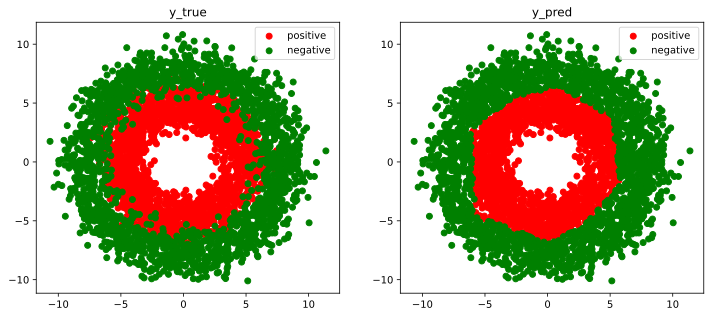

In [106]:
# 结果可视化
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
ax1.scatter(xp[:, 0], xp[:, 1], c = 'r')
ax1.scatter(xn[:, 0], xn[:, 1], c = 'g')
ax1.legend(['positive', 'negative']);
ax1.set_title('y_true');

xP_pred = x[torch.squeeze(model.forward(x) >= 0.5)]
xn_pred = x[torch.squeeze(model.forward(x) < 0.5)]

ax2.scatter(xP_pred[:, 0], xP_pred[:, 1], c = 'r')
ax2.scatter(xn_pred[:, 0], xn_pred[:, 1], c = 'g')
ax2.legend(['positive', 'negative']);
ax2.set_title('y_pred');